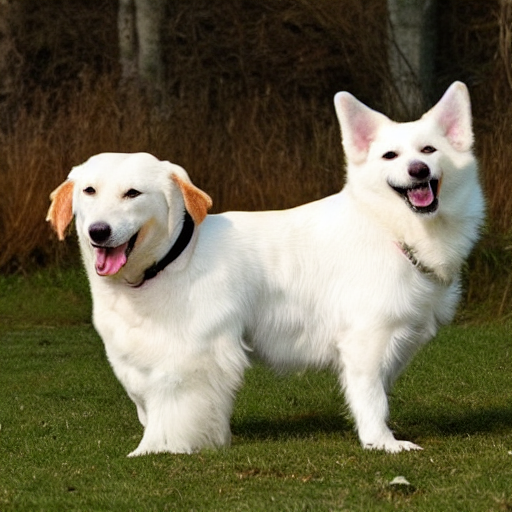

In [2]:
#Simple txt2img API test

import io
import requests
from PIL import Image
import base64
import IPython.display
import json

#For a full list of parms, check http://127.0.0.1:7860/docs#/default/text2imgapi_sdapi_v1_txt2img_post

payload = {
   
        "prompt": "A happy doggo",
        
        #There are tons of optional parms, let's just set the sampler
        "steps": 50,
        "sampler_index": "DDIM"
}

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://127.0.0.1:7860/sdapi/v1/txt2img", data=payloadJson).json()

if resp.get("images") is None:
    #uh oh, something is wrong. Show what it sent us, it's probably an error of some kind
    print("Error, got this returned:")
    print(resp)

else:

    for i in resp['images']:
        img = Image.open(io.BytesIO(base64.b64decode(i)))
        display(img)
